In [1]:
from C_oblique_decision_tree_benchmark.visualization.single_run_plots import (plot_coverage_density_for_shape,
                                                                              plot_decision_regions_from_dict,
                                                                              plot_oblique_splits_from_dict,
                                                                              plot_oblique_splits_clipped)
from C_oblique_decision_tree_benchmark.evaluation.benchmark_runner import DepthSweepRunner
from C_oblique_decision_tree_benchmark.evaluation.io_utils import load_trees_dict, load_depth_sweep_df

from _adopted_oblique_trees.segmentor import CARTSegmentor
from _adopted_oblique_trees.split_criteria import gini
from HHCART import HHCartD

from src.load_shapes import load_shape_dataset

In [2]:
# Load & scale dataset
# datasets = load_shape_dataset()
datasets = load_shape_dataset(folder_name="")
dataset = "barbell_3d_label_noise_000"

datasets_dict = {
    dataset: datasets[dataset]
}
X, y = datasets[dataset]


Loaded 45 paired datasets: ['barbell_2d_label_noise_000', 'barbell_3d_label_noise_000', 'radial_segment_2d_label_noise_000', 'radial_segment_3d_label_noise_000', 'rectangle_2d_label_noise_000', 'saddle_3d_label_noise_000', 'sine_wave_2d_label_noise_000', 'star_2d_label_noise_000', 'barbell_2d_label_noise_003', 'barbell_3d_label_noise_003', 'radial_segment_2d_label_noise_003', 'radial_segment_3d_label_noise_003', 'rectangle_2d_label_noise_003', 'saddle_3d_label_noise_003', 'sine_wave_2d_label_noise_003', 'star_2d_label_noise_003', 'barbell_2d_label_noise_005', 'barbell_3d_label_noise_005', 'radial_segment_2d_label_noise_005', 'radial_segment_3d_label_noise_005', 'rectangle_2d_label_noise_005', 'saddle_3d_label_noise_005', 'sine_wave_2d_label_noise_005', 'star_2d_label_noise_005', 'barbell_2d_label_noise_007', 'barbell_3d_label_noise_007', 'radial_segment_2d_label_noise_007', 'radial_segment_3d_label_noise_007', 'rectangle_2d_label_noise_007', 'saddle_3d_label_noise_007', 'sine_wave_2d_

In [3]:
# Instantiate HHCART with mutual information as feature selector
hh = HHCartD(X, y, max_depth=6)

In [4]:
# Build trees with top-K feature subsets (e.g., top 2, 3, 4, 5 features)
hh.build_tree()

⚠️ No feature selection specified — using all features.


Building tree layer by layer: 100%|██████████| 6/6 [01:09<00:00, 11.55s/depth]

✅ Tree built to depth 6


In [5]:
hh.print_tree(depth=6)

Tree structure for k=None, depth=6:
[Node id=1, depth=0] (split: -0.64*x0 -0.59*x1 +0.49*x2 + +0.06 >= 0)
├── [Node id=2, depth=1] (split: -0.64*x0 -0.59*x1 +0.49*x2 + +0.66 >= 0)
├── ├── [Node id=4, depth=2] (split: +0.24*x0 +0.40*x1 +0.89*x2 + -0.53 >= 0)
├── ├── ├── [Node id=8, depth=3] (leaf: prediction=0, purity=0.98, samples=355)
├── ├── └── [Node id=9, depth=3] (split: +0.36*x0 +0.01*x1 +0.93*x2 + -0.80 >= 0)
├── ├── └── ├── [Node id=14, depth=4] (split: -0.74*x0 +0.67*x1 +0.01*x2 + -0.17 >= 0)
├── ├── └── ├── ├── [Node id=22, depth=5] (split: +0.51*x0 +0.84*x1 -0.19*x2 + -1.15 >= 0)
├── ├── └── ├── ├── ├── [Node id=32, depth=6] (leaf: prediction=1, purity=0.71, samples=750)
├── ├── └── ├── ├── └── [Node id=33, depth=6] (leaf: prediction=0, purity=0.94, samples=116)
├── ├── └── ├── └── [Node id=23, depth=5] (leaf: prediction=0, purity=0.99, samples=157)
├── ├── └── └── [Node id=15, depth=4] (leaf: prediction=0, purity=1.00, samples=284)
├── └── [Node id=5, depth=2] (split: -0.57

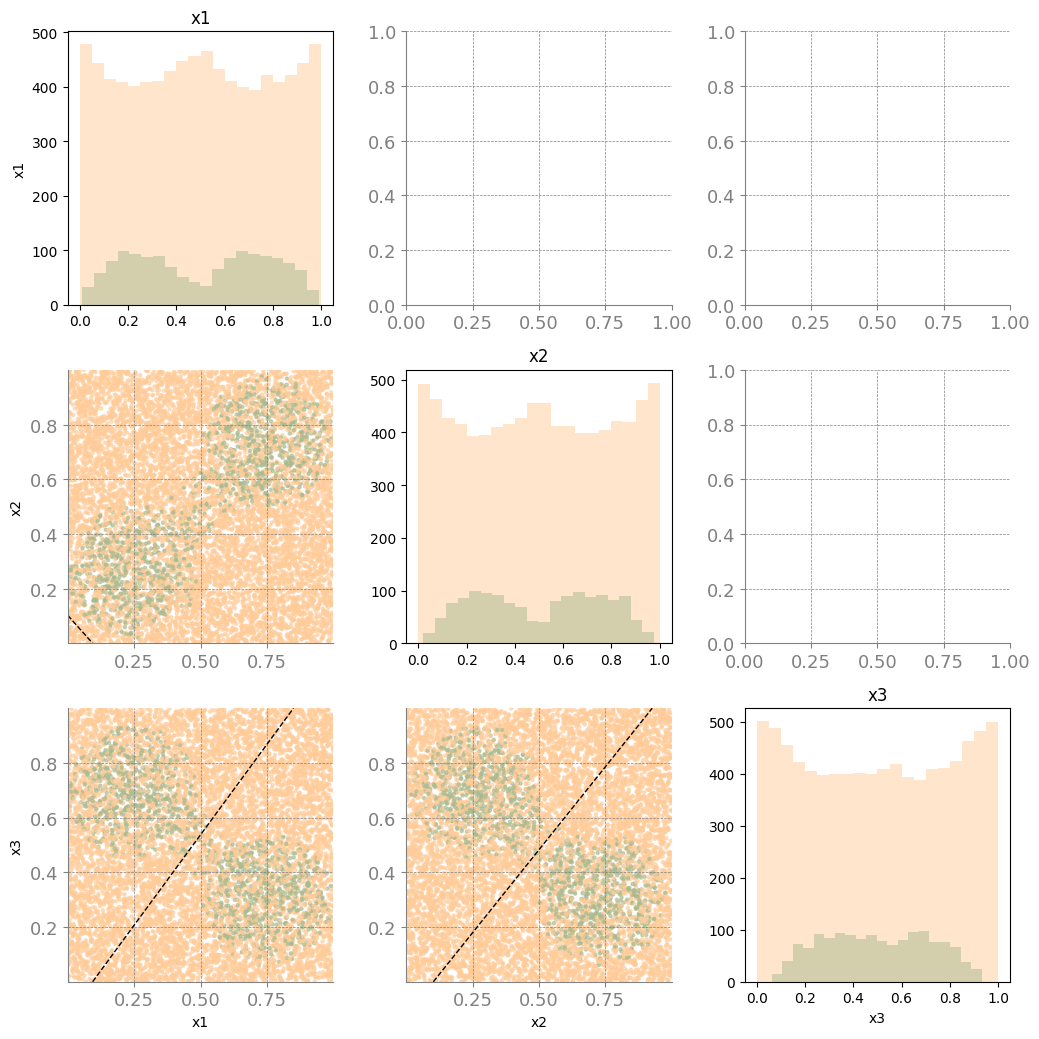

In [8]:
# Visualise pairwise splits for (k=3, depth=3)
hh.plot_pairwise_splits(depth=6)

In [15]:
# Save the metrics DataFrame to CSV in the current folder
hh.metrics_df.to_csv("metrics_hhcart.csv", index=False)
print("✅ Saved metrics to 'metrics_hhcart.csv'")

✅ Saved metrics to 'metrics_hhcart.csv'


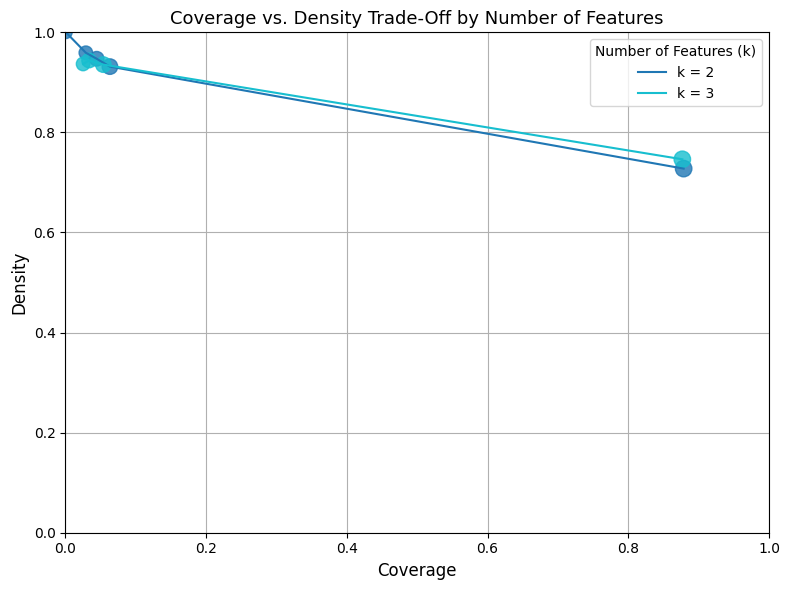

In [16]:
hh.plot_coverage_density_tradeoff()

In [7]:
# Select tree at depth 3 using top 6 features
hh.select(depth=3, k=3)

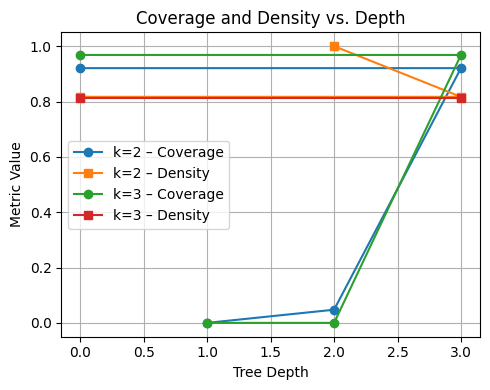

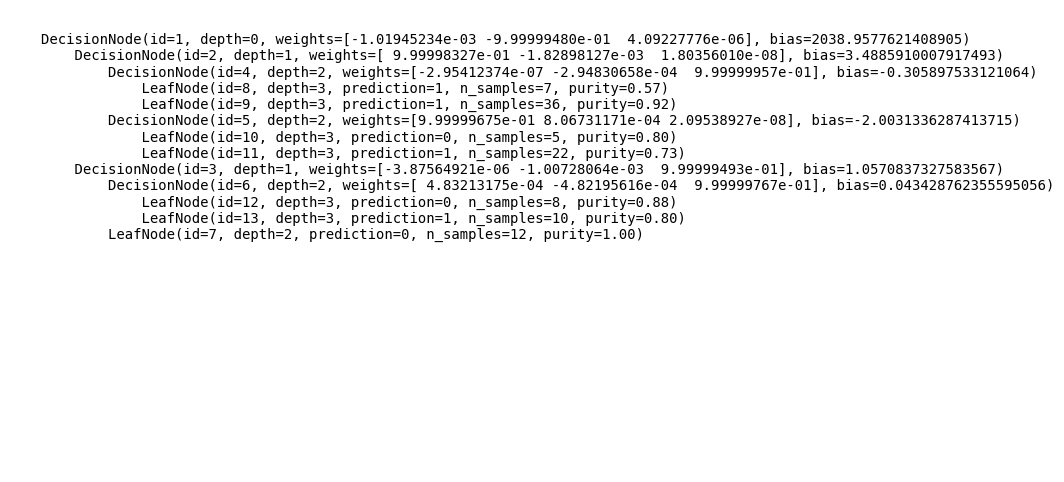

AttributeError: 'DecisionTree' object has no attribute 'print_structure'

In [8]:
# Visualise and inspect
hh.plot_tradeoff()
hh.plot_tree()
hh.inspect()
hh.show_pairs_scatter()